In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, validation_curve


In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
pd.set_option('display.float_format', lambda x:'%.3f'%x)


In [31]:
import chardet

# Dosyanın kodlamasını tespit etme
with open('Sample\global_youtube_statistic.csv', 'rb') as f:
    result = chardet.detect(f.read())

print("Detected Encoding:", result['encoding'])

Detected Encoding: ISO-8859-1


In [32]:
df= pd.read_csv('Sample\global_youtube_statistic.csv', encoding='ISO-8859-1')
df.head(20)
# Öncelikle aynı bilgiyi taşıyan kategorileri teşhis edeceğim ve sonrasında çıkaracağım [Youtuber, Title], Aynı zamanda makine öğrenmesi modeline dahil edilmeyecek bunlar çünkü cardigal değerler ve öğrenme anlamında bir bilgi taşımıyorlar

#subscribers: Abone sayısı. Modelin bağımlı değişkeni bu olarak kabul ediyorum. 

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.000,Music,T-Series,20082,India,IN,Music,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,US,Games,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3,MrBeast,166000000,28368841870.000,Entertainment,MrBeast,741,United States,US,Entertainment,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5,SET India,159000000,148000000000.000,Shows,SET India,116536,India,IN,Entertainment,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
5,6,Music,119000000,0.000,NaN,Music,0,NaN,NaN,Music,4057944.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,NaN,2013.000,Sep,24.000,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,93247040539.000,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,NaN,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
7,8,PewDiePie,111000000,29058044447.000,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,NaN,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253
8,9,Like Nastya,106000000,90479060027.000,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,Jan,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319
9,10,Vlad and Niki,98900000,77180169894.000,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.000,5.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,2018.000,Apr,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713


In [33]:
def data_information(dataframe):
    print("##########  SHAPE  ###########")
    print(dataframe.shape)
    print("##########  Columns  ###########")
    print(dataframe.columns)
    print("##########  datatypes  ###########")
    print(dataframe.dtypes[:5])
    print("##########  Describes and Quantiles  ###########")
    print(dataframe.describe([0.0, 0.05, 0.25, 0.5, 0.75,0.95, 1]))
    print("##########  NA Numbers  ###########")
    print(dataframe.isnull().sum())
data_information(df)

##########  SHAPE  ###########
(995, 28)
##########  Columns  ###########
Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title', 'uploads', 'Country', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_month', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], dtype='object')
##########  datatypes  ###########
rank             int64
Youtuber        object
subscribers      int64
video views    float64
category        object
dtype: object
##########  Describes and Quantiles  ###########
         rank   subscribers      video views    uploads  video_views_rank  country_rank  channel_type_rank  video_views_for_the_last_30_days  lowest_monthly_ea

In [34]:
df.isnull().sum().sort_values(ascending=False)

subscribers_for_last_30_days               337
Longitude                                  123
Latitude                                   123
Urban_population                           123
Unemployment rate                          123
Population                                 123
Gross tertiary education enrollment (%)    123
Country                                    122
Abbreviation                               122
country_rank                               116
video_views_for_the_last_30_days            56
category                                    46
channel_type_rank                           33
channel_type                                30
created_date                                 5
created_month                                5
created_year                                 5
video_views_rank                             1
rank                                         0
highest_yearly_earnings                      0
lowest_yearly_earnings                       0
highest_month

In [35]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan.head(20)
# Buradan görüyoruz ki 
#Longitude                                  123
#Latitude                                   123
#Urban_population                           123
#Unemployment rate                          123
#Population                                 123
#Gross tertiary education enrollment (%)    123 ( Bu değerlerin hepsi aynı satırda ve boştur çünkü birinin yaşadığı ülkeyi bilmezsen, lokasyonu ve enlem boylamını da bilemezsin.)
#Abbreviation ve country de birbirine bağlı

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000,Film & Animation,youtubemovies,1,United States,US,Games,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,NaN,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
5,6,Music,119000000,0.000,NaN,Music,0,NaN,NaN,Music,4057944.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,NaN,2013.000,Sep,24.000,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,93247040539.000,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,NaN,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
7,8,PewDiePie,111000000,29058044447.000,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,NaN,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253
12,13,Gaming,93600000,0.000,NaN,Gaming,0,NaN,NaN,Games,4057944.000,NaN,1.000,NaN,0.000,0.000,0.000,0.000,NaN,2013.000,Dec,15.000,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,24118230580.000,Film & Animation,goldmines,1,NaN,NaN,Music,4056562.000,NaN,5663.000,18.000,0.000,0.070,0.050,0.860,NaN,2006.000,Aug,15.000,NaN,NaN,NaN,NaN,NaN,NaN
16,17,5-Minute Crafts,80100000,26236790209.000,Howto & Style,5-Minute Crafts 2.0,1,United Kingdom,GB,Entertainment,4057901.000,4797.000,6781.000,1.000,0.000,0.000,0.000,0.050,NaN,2020.000,Jul,27.000,60.000,66834405.000,3.850,55908316.000,55.378,-3.436
18,19,Sports,75000000,0.000,NaN,sports,3,United States,US,Entertainment,3898122.000,6266.000,5395.000,16.000,0.000,0.060,0.050,0.770,NaN,2006.000,Jan,30.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
23,24,Canal KondZilla,66500000,36775585925.000,Music,Canal KondZilla,2572,Brazil,BR,Music,25.000,1.000,7.000,447223000.000,0.000,0.000,0.000,0.000,NaN,2012.000,Mar,21.000,51.300,212559417.000,12.080,183241641.000,-14.235,-51.925
27,28,T-Series Bhakti Sagar,61000000,29533230328.000,Music,T- SERIES BHAKTI SAGAR,13,India,IN,Music,4053938.000,5803.000,5744.000,10.000,0.000,0.040,0.030,0.480,NaN,2018.000,Aug,3.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963


In [36]:
def grap_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    cat_but_car= [col for col in cat_cols if dataframe[col].nunique() > car_th]
    num_cols= [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_but_cat=[col for col in num_cols if dataframe[col].nunique() < cat_th]
    cat_cols= [col for col in cat_cols if col not in cat_but_car]
    cat_cols= num_but_cat + cat_cols
    #Numeric columns
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car= grap_col_names(df)
print(f'cat_cols: {cat_cols}')
print(f'num_cols: {num_cols}')
print(f'categoric but cardigal: {cat_but_car}')
    

cat_cols: ['category', 'channel_type', 'created_month']
num_cols: ['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']
categoric but cardigal: ['Youtuber', 'Title', 'Country', 'Abbreviation']


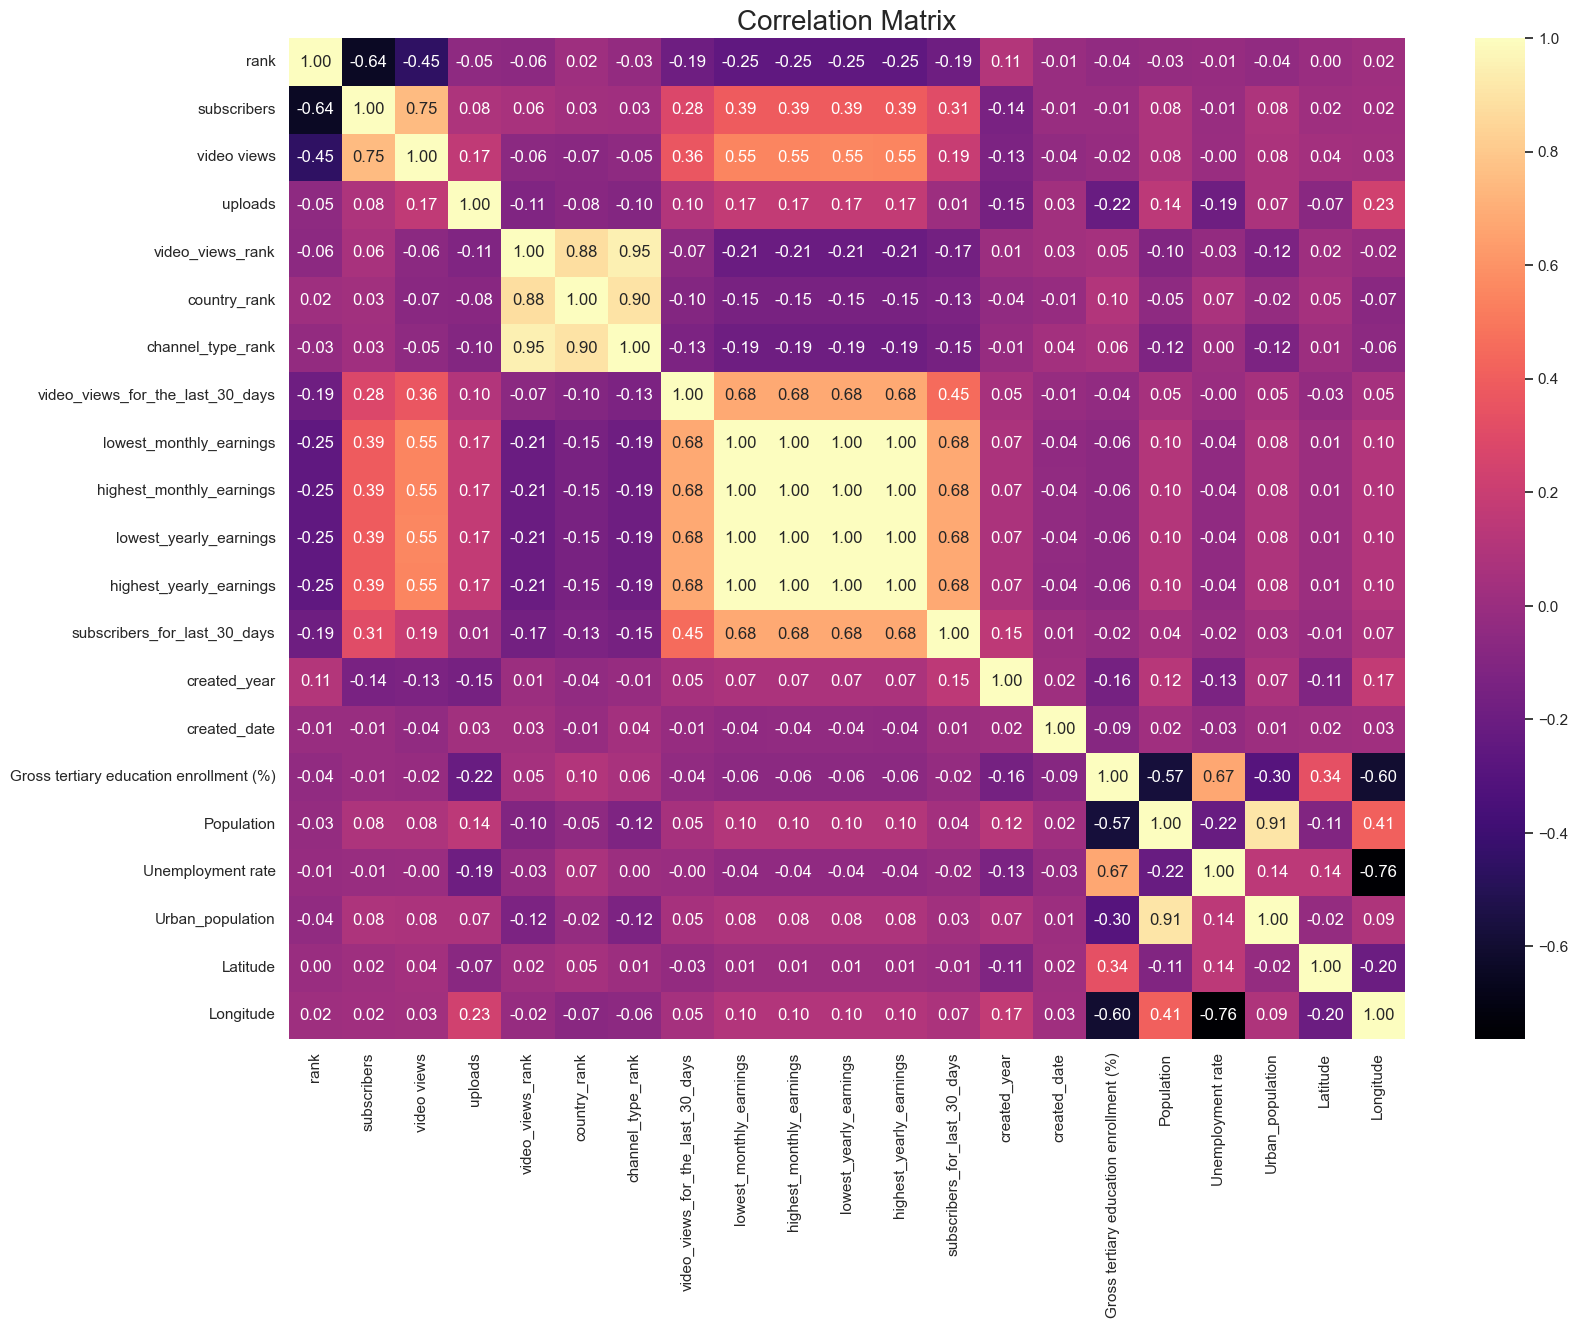

In [37]:

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True) 
# Bazı veriler arasında çok yüksek korelasyon var bu verileri modeli kurarken tekrar inceleyeceğim.

In [38]:
from sklearn.impute import KNNImputer




In [39]:
# KNN İMPUTER KULLANARAK SAYISAL DEĞERLERİ EN YAKIN KOMŞUYA GÖRE DOLDURDUM.
imputer = KNNImputer(n_neighbors=3)  # Komşu sayısını belirleyin
df_filled = imputer.fit_transform(df[num_cols])
df_filled
df_temp=df.copy()
df_temp[num_cols]=pd.DataFrame(df_filled, columns=num_cols)
df_temp.head(20)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1.000,T-Series,245000000.000,228000000000.000,Music,T-Series,20082.000,India,IN,Music,1.000,1.000,1.000,2258000000.000,564600.000,9000000.000,6800000.000,108400000.000,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
1,2.000,YouTube Movies,170000000.000,0.000,Film & Animation,youtubemovies,1.000,United States,US,Games,4055159.000,7670.000,7423.000,12.000,0.000,0.050,0.040,0.580,101196.000,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
2,3.000,MrBeast,166000000.000,28368841870.000,Entertainment,MrBeast,741.000,United States,US,Entertainment,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,8000000.000,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
3,4.000,Cocomelon - Nursery Rhymes,162000000.000,164000000000.000,Education,Cocomelon - Nursery Rhymes,966.000,United States,US,Education,2.000,2.000,1.000,1975000000.000,493800.000,7900000.000,5900000.000,94800000.000,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
4,5.000,SET India,159000000.000,148000000000.000,Shows,SET India,116536.000,India,IN,Entertainment,3.000,2.000,2.000,1824000000.000,455900.000,7300000.000,5500000.000,87500000.000,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963
5,6.000,Music,119000000.000,0.000,NaN,Music,0.000,NaN,NaN,Music,4057944.000,4673.333,4273.000,9.667,0.000,0.000,0.000,0.000,233333.333,2013.000,Sep,24.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
6,7.000,ýýý Kids Diana Show,112000000.000,93247040539.000,People & Blogs,ýýý Kids Diana Show,1111.000,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,600000.000,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713
7,8.000,PewDiePie,111000000.000,29058044447.000,Gaming,PewDiePie,4716.000,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,433333.333,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253
8,9.000,Like Nastya,106000000.000,90479060027.000,People & Blogs,Like Nastya Vlog,493.000,Russia,RU,People,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,Jan,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319
9,10.000,Vlad and Niki,98900000.000,77180169894.000,Entertainment,Vlad and Niki,574.000,United States,US,Entertainment,8.000,5.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,2018.000,Apr,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713


In [40]:
def fill_cats_with_mode(dataframe, cat_col):
    dataframe[cat_col].fillna(dataframe[cat_col].mode()[0])
    
for col in cat_cols:
    fill_cats_with_mode(df_temp, col)

# Kategorik değerleri Mode ile doldurduk

In [41]:
columns_to_dropna= ["Youtuber","category", "Title", "Abbreviation","channel_type","created_month"]
df_cleaned = df_temp.dropna(subset=columns_to_dropna)
df_cleaned.isnull().sum()
#Mode ile doldurulamayan değişkenleri cardigal değişkenlerin Na larını tamamen sildik.


rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

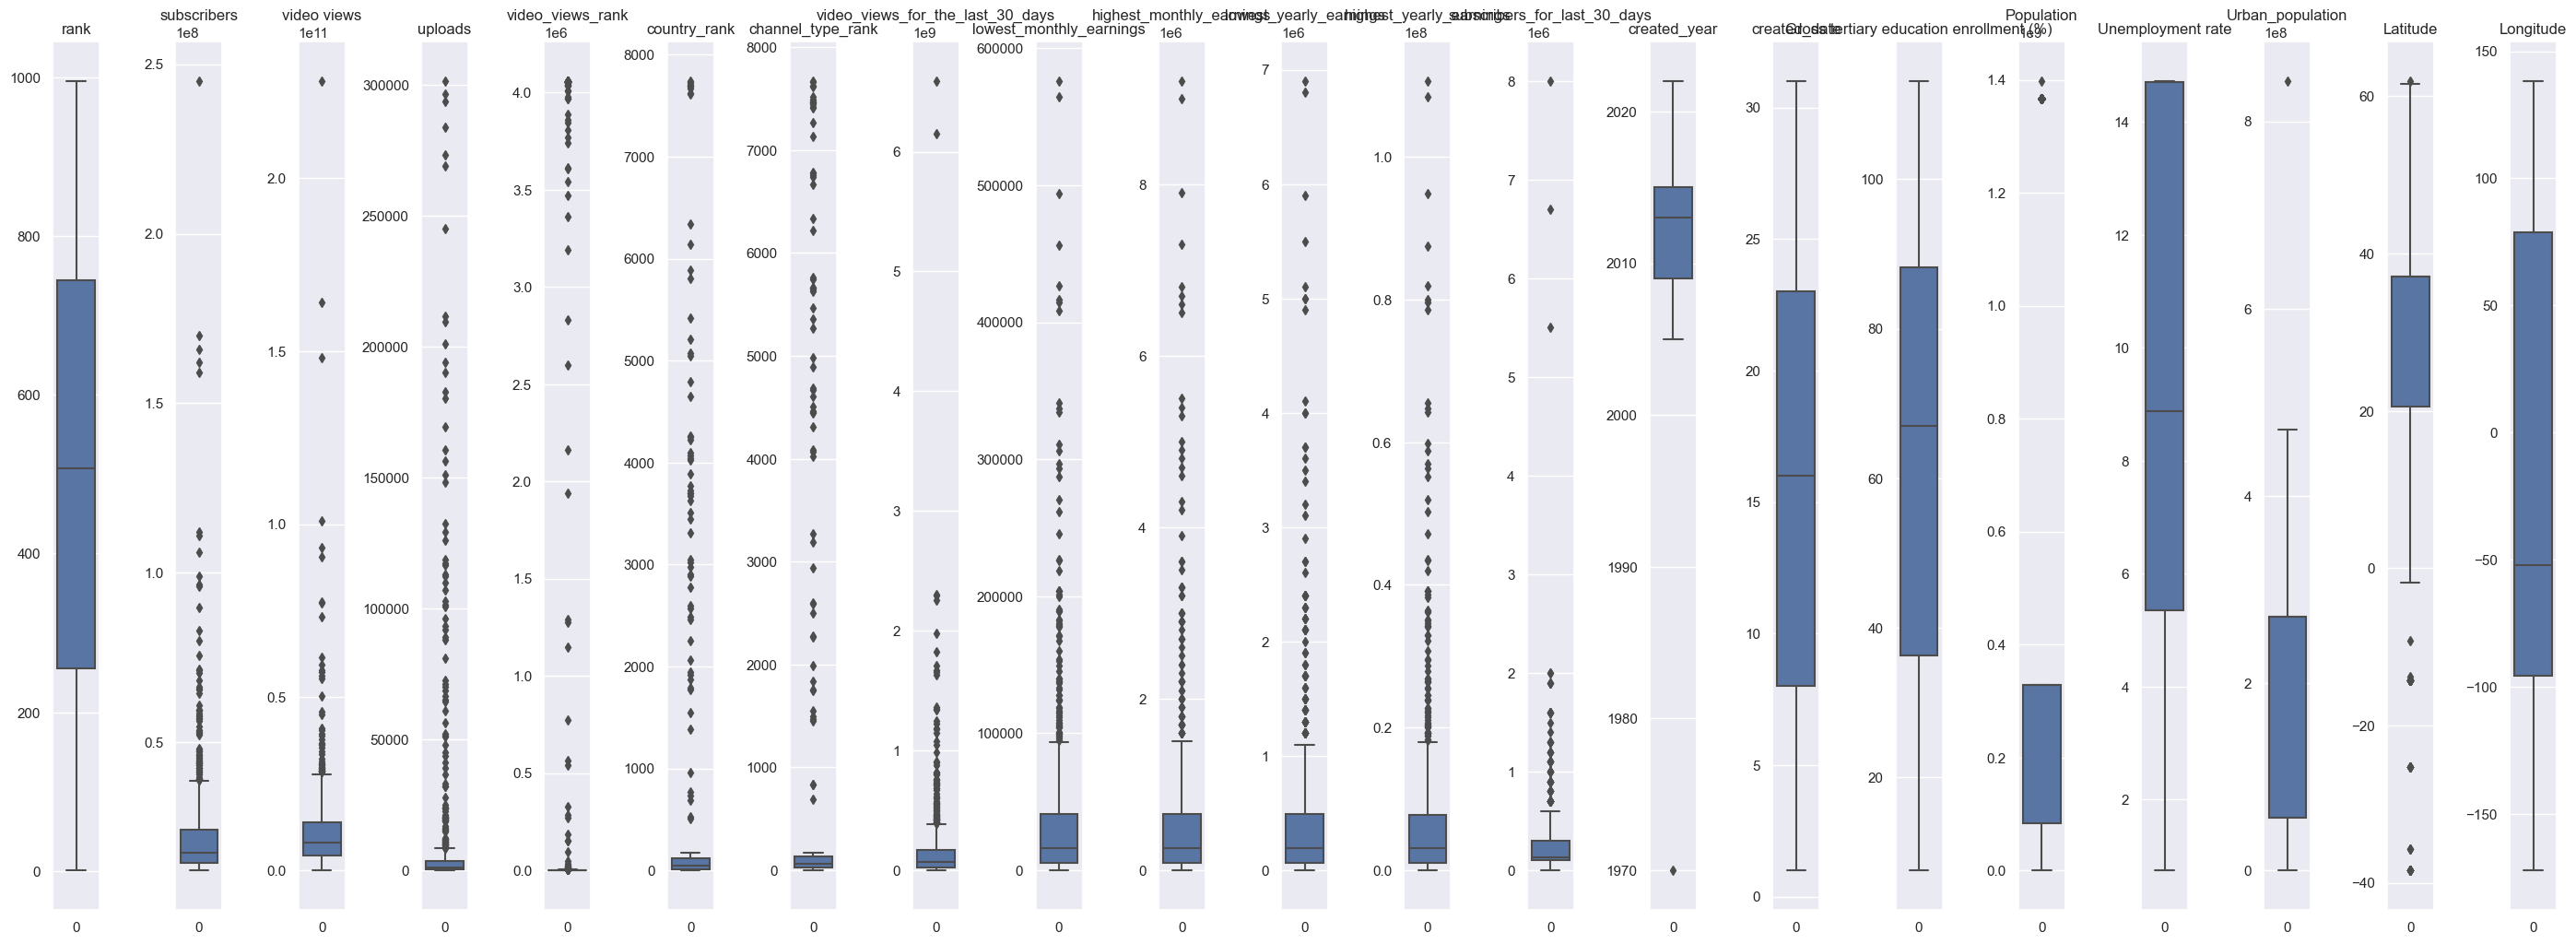

In [42]:
#BOX PLOT İLE OUTLİERS DEĞERLERİ GÖRÜYORUZ.
num_plots = len(num_cols)

plt.figure(figsize=(28, 20))

for i, column in enumerate(df_cleaned[num_cols]):
    plt.subplot(2, num_plots, i + 1)
    sns.boxplot(df_cleaned[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

In [43]:

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit =quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    if check_outlier(df_cleaned, col, q1=0.05, q3=0.95):
        replace_with_thresholds(df_cleaned, col)
        

    

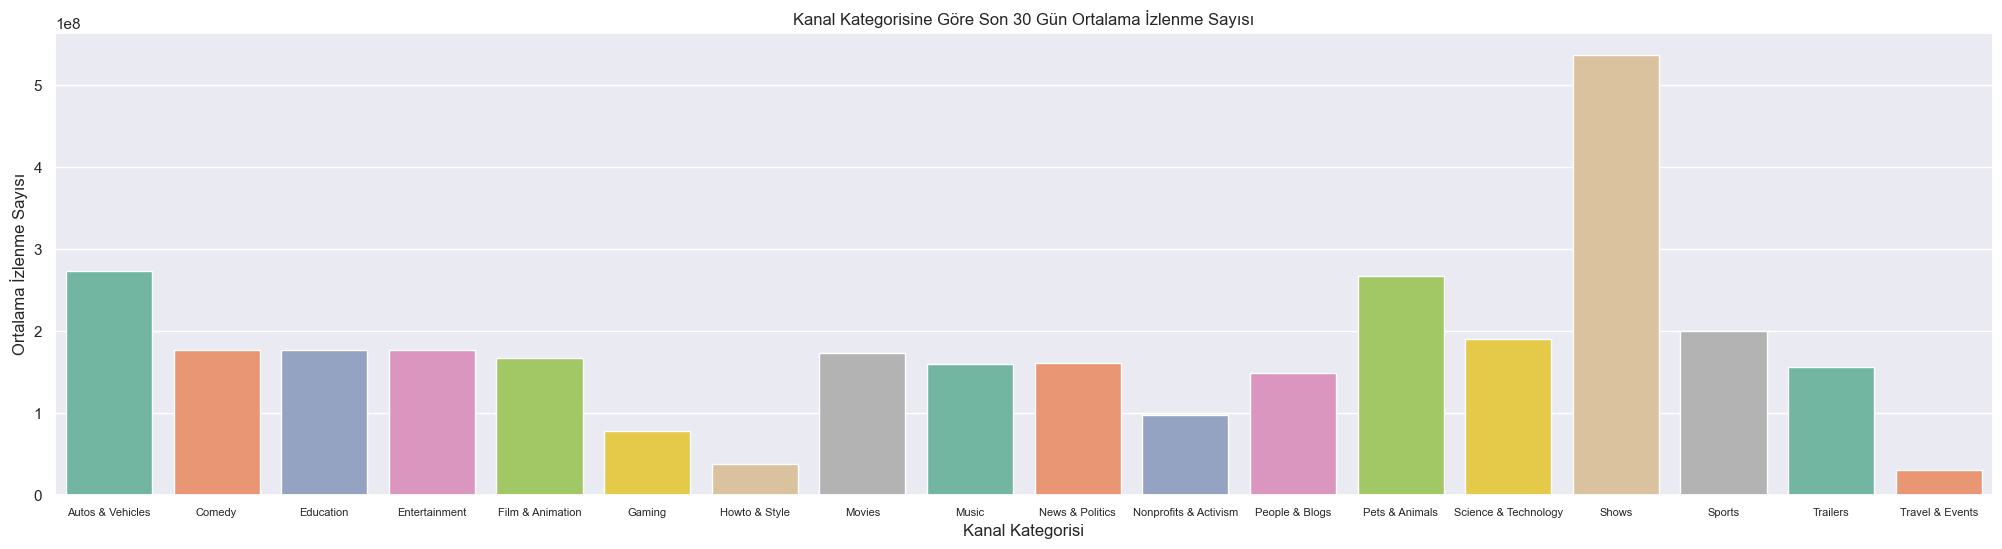

In [44]:
average_views_by_category = df_cleaned.groupby('category')['video_views_for_the_last_30_days'].mean().reset_index()
plt.figure(figsize=(25, 6))  # Genişlik: 20, Yükseklik:6 
ax= sns.barplot(x='category', y='video_views_for_the_last_30_days', data=average_views_by_category, palette='Set2')
plt.xlabel('Kanal Kategorisi')
plt.ylabel('Ortalama İzlenme Sayısı')
ax.tick_params(axis='x', labelsize=8)
plt.title('Kanal Kategorisine Göre Son 30 Gün Ortalama İzlenme Sayısı')
plt.show()
#Bu grafiğe göre görüyoruz ki Otomobil ve araç konulu videolar daha çok izleniyor

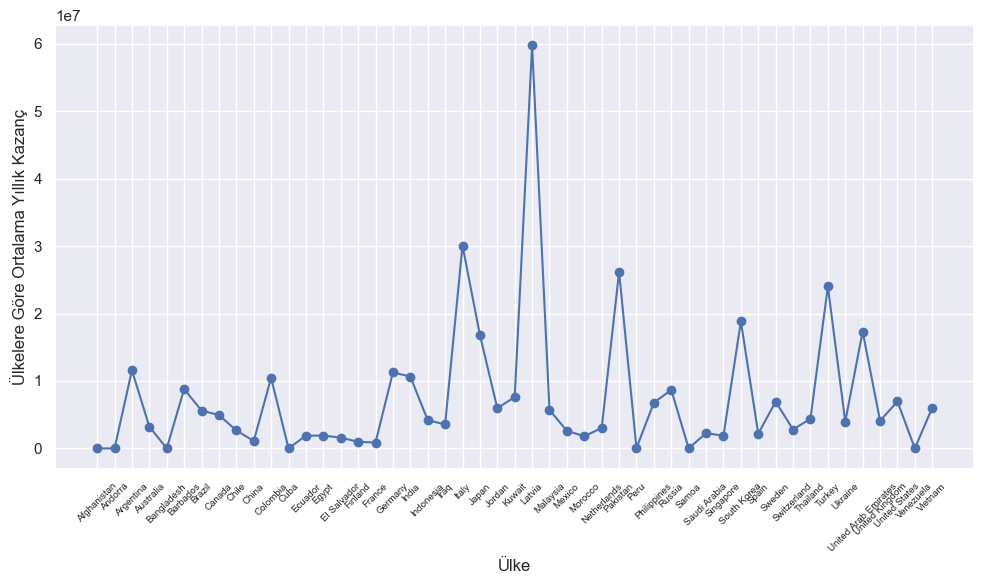

In [45]:
average_earnings_by_type = df.groupby('Country')['highest_yearly_earnings'].mean().reset_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(average_earnings_by_type['Country'], average_earnings_by_type['highest_yearly_earnings'], marker='o')
plt.xlabel('Ülke')
plt.ylabel('Ülkelere Göre Ortalama Yıllık Kazanç')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=7)
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()
# Bu görsele göre latvia'nın ortalama kazanç miktarı daha yüksektir.

In [46]:
# En çok izlenen youtuberleri enlem ve boylamına göre haritada gösterir. Orjinal veri setindeki bütün na ları sildim çünkü eksik değerler haritadaki konumların yanlış gözükmesine neden olur.
import folium

most_watched_youtubers= df.groupby('Country')['subscribers'].idxmax()
best_youtubers= df.loc[most_watched_youtubers]
best_youtubers.dropna(inplace=True)

# Harita merkezi için ortalama koordinatları hesapla
center_lat = best_youtubers['Latitude'].mean()
center_long = best_youtubers['Longitude'].mean()

# Haritayı oluştur
m = folium.Map(location=[center_lat, center_long], zoom_start=3)

# DataFrame'deki her bir satırı gez
for index, row in best_youtubers.iterrows():
    # Youtuber ismini al
    youtuber = row['Youtuber']
    # Koordinatları al
    lat = row['Latitude']
    long = row['Longitude']
    # İşaretçi oluştur ve haritaya ekle
    folium.Marker([lat, long], popup=youtuber).add_to(m)

m


In [47]:
#Percentage of follower growth rate in the last week
df_cleaned['increasement_in_1_month']= 100 * df_cleaned['subscribers_for_last_30_days'] / df_cleaned['subscribers']
# The ratio of its rank in its own country by the number of subscribers and its rank worldwide
df_cleaned['rate_of_subscribers']= df_cleaned['country_rank'] /df_cleaned['rank']
#the ratio of highest monthly earning and yearly earning
df_cleaned['highest_earning_rate'] = df_cleaned['highest_monthly_earnings'] /(df_cleaned['highest_yearly_earnings']+1)
# the ratio of lowest monthly earning and yearly earning
df_cleaned['lowest_earning_rate']= df_cleaned['lowest_monthly_earnings'] /(df_cleaned['lowest_yearly_earnings']+1) # 0/0 eşitsizliğinden NAN vermesin diye 1 ekledim 

df_cleaned['average_monthly_earnings']= (df_cleaned['lowest_monthly_earnings'] + df_cleaned['highest_monthly_earnings'])/ 2
df_cleaned['average_yearly_earnings']= (df_cleaned['highest_yearly_earnings'] + df_cleaned['lowest_yearly_earnings'])/2
 
df_cleaned.head(20)


C:\Users\ekuru\AppData\Local\Temp\ipykernel_24108\1778457786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['increasement_in_1_month']= 100 * df_cleaned['subscribers_for_last_30_days'] / df_cleaned['subscribers']
C:\Users\ekuru\AppData\Local\Temp\ipykernel_24108\1778457786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate_of_subscribers']= df_cleaned['country_rank'] /df_cleaned['rank']
C:\Users\ekuru\AppData\Local\Temp\ipykernel_24108\1778457786.py:6: SettingWithCopyWarnin

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,increasement_in_1_month,rate_of_subscribers,highest_earning_rate,lowest_earning_rate,average_monthly_earnings,average_yearly_earnings
0,1.000,T-Series,99650000.000,68974969097.800,Music,T-Series,20082.000,India,IN,Music,1.000,1.000,1.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,2000000.000,2006.000,Mar,13.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,2.007,1.000,0.082,0.085,3190374.949,38824999.377
1,2.000,YouTube Movies,99650000.000,0.000,Film & Animation,youtubemovies,1.000,United States,US,Games,4055159.000,6845.000,7423.000,12.000,0.000,0.050,0.040,0.580,101196.000,2006.000,Mar,5.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,0.102,3422.500,0.032,0.000,0.025,0.310
2,3.000,MrBeast,99650000.000,28368841870.000,Entertainment,MrBeast,741.000,United States,US,Entertainment,48.000,1.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,2199656.300,2012.000,Feb,20.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,2.207,0.333,0.083,0.084,2868500.000,34350000.000
3,4.000,Cocomelon - Nursery Rhymes,99650000.000,68974969097.800,Education,Cocomelon - Nursery Rhymes,966.000,United States,US,Education,2.000,2.000,1.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,1000000.000,2006.000,Sep,1.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,1.004,0.500,0.082,0.085,3190374.949,38824999.377
4,5.000,SET India,99650000.000,68974969097.800,Shows,SET India,116536.000,India,IN,Entertainment,3.000,2.000,2.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,1000000.000,2006.000,Sep,20.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,1.004,0.400,0.082,0.085,3190374.949,38824999.377
6,7.000,ýýý Kids Diana Show,99650000.000,68974969097.800,People & Blogs,ýýý Kids Diana Show,1111.000,United States,US,Entertainment,5.000,3.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,600000.000,2015.000,May,12.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,0.602,0.429,0.083,0.083,1541450.000,18650000.000
7,8.000,PewDiePie,99650000.000,29058044447.000,Gaming,PewDiePie,4716.000,Japan,JP,Entertainment,44.000,1.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,433333.333,2010.000,Apr,29.000,63.200,126226568.000,2.290,115782416.000,36.205,138.253,0.435,0.125,0.082,0.083,83250.000,1008800.000
8,9.000,Like Nastya,99650000.000,68974969097.800,People & Blogs,Like Nastya Vlog,493.000,Russia,RU,People,630.000,5.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,2016.000,Jan,14.000,81.900,144373535.000,4.590,107683889.000,61.524,105.319,0.100,0.556,0.085,0.083,104000.000,1223400.000
9,10.000,Vlad and Niki,98900000.000,68974969097.800,Entertainment,Vlad and Niki,574.000,United States,US,Entertainment,8.000,5.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,2018.000,Apr,23.000,88.200,328239523.000,14.700,270663028.000,37.090,-95.713,0.607,0.500,0.082,0.085,1222550.000,14800000.000
10,11.000,Zee Music Company,96700000.000,57856289381.000,Music,Zee Music Company,8548.000,India,IN,Music,12.000,3.000,2.000,803613000.000,200900.000,3200000.000,2400000.000,38600000.000,1100000.000,2014.000,Mar,12.000,28.100,1366417754.000,5.360,471031528.000,20.594,78.963,1.138,0.273,0.083,0.084,1700450.000,20500000.000


In [48]:
# Encoding işlemi
# Cardigal değişkenler class sayısı encoding işlemine sokulması veriyi karmaşıklaştıracak verilerdir Bu nedenle sileceğiz.
drop_list= ['Youtuber', 'Title', 'Country', 'Abbreviation', 'created_year', 'Latitude', 'Longitude','created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population','video_views_rank', 'country_rank','rank','created_month','category']
df_cleaned= df_cleaned.drop(columns=drop_list)

#Label encoding 
cat_cols, num_cols, cat_but_car= grap_col_names(df_cleaned)
print(f'cat_cols: {cat_cols}')
print(f'num_cols: {num_cols}')
print(f'categoric but cardigal: {cat_but_car}')


binary_cols= [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2 and df_cleaned[col].dtypes == 'O']

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df_cleaned = label_encoder(df_cleaned, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_cleaned = one_hot_encoder(df_cleaned, cat_cols, drop_first=True)

 



cat_cols: ['channel_type']
num_cols: ['subscribers', 'video views', 'uploads', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'increasement_in_1_month', 'rate_of_subscribers', 'highest_earning_rate', 'lowest_earning_rate', 'average_monthly_earnings', 'average_yearly_earnings']
categoric but cardigal: []


In [49]:
df_cleaned.head(20)

,subscribers,video views,uploads,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,increasement_in_1_month,rate_of_subscribers,highest_earning_rate,lowest_earning_rate,average_monthly_earnings,average_yearly_earnings,channel_type_Autos,channel_type_Comedy,channel_type_Education,channel_type_Entertainment,channel_type_Film,channel_type_Games,channel_type_Howto,channel_type_Music,channel_type_News,channel_type_Nonprofit,channel_type_People,channel_type_Sports,channel_type_Tech
0,99650000.000,68974969097.800,20082.000,1.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,2000000.000,2.007,1.000,0.082,0.085,3190374.949,38824999.377,False,False,False,False,False,False,False,True,False,False,False,False,False
1,99650000.000,0.000,1.000,7423.000,12.000,0.000,0.050,0.040,0.580,101196.000,0.102,3422.500,0.032,0.000,0.025,0.310,False,False,False,False,False,True,False,False,False,False,False,False,False
2,99650000.000,28368841870.000,741.000,1.000,1348000000.000,337000.000,5400000.000,4000000.000,64700000.000,2199656.300,2.207,0.333,0.083,0.084,2868500.000,34350000.000,False,False,False,True,False,False,False,False,False,False,False,False,False
3,99650000.000,68974969097.800,966.000,1.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,1000000.000,1.004,0.500,0.082,0.085,3190374.949,38824999.377,False,False,True,False,False,False,False,False,False,False,False,False,False
4,99650000.000,68974969097.800,116536.000,2.000,1660843219.000,380749.997,5999999.901,4499999.919,73149998.836,1000000.000,1.004,0.400,0.082,0.085,3190374.949,38824999.377,False,False,False,True,False,False,False,False,False,False,False,False,False
6,99650000.000,68974969097.800,1111.000,3.000,731674000.000,182900.000,2900000.000,2200000.000,35100000.000,600000.000,0.602,0.429,0.083,0.083,1541450.000,18650000.000,False,False,False,True,False,False,False,False,False,False,False,False,False
7,99650000.000,29058044447.000,4716.000,4.000,39184000.000,9800.000,156700.000,117600.000,1900000.000,433333.333,0.435,0.125,0.082,0.083,83250.000,1008800.000,False,False,False,True,False,False,False,False,False,False,False,False,False
8,99650000.000,68974969097.800,493.000,25.000,48947000.000,12200.000,195800.000,146800.000,2300000.000,100000.000,0.100,0.556,0.085,0.083,104000.000,1223400.000,False,False,False,False,False,False,False,False,False,False,True,False,False
9,98900000.000,68974969097.800,574.000,6.000,580574000.000,145100.000,2300000.000,1700000.000,27900000.000,600000.000,0.607,0.500,0.082,0.085,1222550.000,14800000.000,False,False,False,True,False,False,False,False,False,False,False,False,False
10,96700000.000,57856289381.000,8548.000,2.000,803613000.000,200900.000,3200000.000,2400000.000,38600000.000,1100000.000,1.138,0.273,0.083,0.084,1700450.000,20500000.000,False,False,False,False,False,False,False,True,False,False,False,False,False


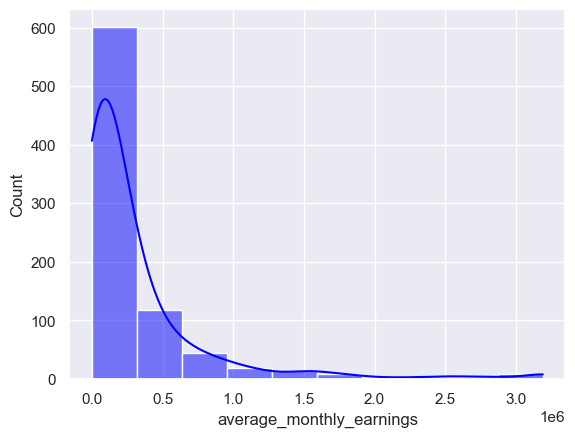

In [50]:
sns.histplot(data=df_cleaned, x='average_monthly_earnings', bins=10, kde=True, color='blue')
plt.show() #Veri dağılımını görmek için yaptım log methodu kullandım ortalamak için

In [51]:
#Standart scaling

standart_scaler= StandardScaler() #Normalde scaling işlemini sadece bağımsız değişkenlere yapacaktım ama modelin erroru bu şekilde daha iyi çıkıyor.
df_cleaned[num_cols] = standart_scaler.fit_transform(df_cleaned[num_cols])
df_cleaned.head()



,subscribers,video views,uploads,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,increasement_in_1_month,rate_of_subscribers,highest_earning_rate,lowest_earning_rate,average_monthly_earnings,average_yearly_earnings,channel_type_Autos,channel_type_Comedy,channel_type_Education,channel_type_Entertainment,channel_type_Film,channel_type_Games,channel_type_Howto,channel_type_Music,channel_type_News,channel_type_Nonprofit,channel_type_People,channel_type_Sports,channel_type_Tech
0,5.421,5.409,0.341,-0.308,5.660,5.667,5.604,5.614,5.670,5.434,0.542,-0.039,0.174,0.337,5.608,5.667,False,False,False,False,False,False,False,True,False,False,False,False,False
1,5.421,-1.021,-0.325,4.986,-0.602,-0.613,-0.615,-0.616,-0.613,-0.502,-0.797,28.541,-2.654,-3.890,-0.615,-0.613,False,False,False,False,False,True,False,False,False,False,False,False,False
2,5.421,1.623,-0.301,-0.308,4.480,4.946,4.982,4.921,4.944,6.059,0.683,-0.044,0.255,0.319,4.980,4.943,False,False,False,True,False,False,False,False,False,False,False,False,False
3,5.421,5.409,-0.293,-0.308,5.660,5.667,5.604,5.614,5.670,2.308,-0.163,-0.043,0.174,0.337,5.608,5.667,False,False,True,False,False,False,False,False,False,False,False,False,False
4,5.421,5.409,3.542,-0.307,5.660,5.667,5.604,5.614,5.670,2.308,-0.163,-0.044,0.174,0.337,5.608,5.667,False,False,False,True,False,False,False,False,False,False,False,False,False


In [52]:
y =np.log1p(df_cleaned['average_monthly_earnings'])
X= df_cleaned.drop(columns=['average_monthly_earnings','average_yearly_earnings','lowest_yearly_earnings', 'highest_yearly_earnings', 'lowest_monthly_earnings','highest_monthly_earnings'], axis=1)


# Verinin eğitim ve tet verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

    
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
    #According to this I will choose GBM Model.

RMSE: 0.8188 (LR) 
RMSE: 0.3367 (Ridge) 
RMSE: 0.6457 (Lasso) 
RMSE: 0.632 (ElasticNet) 
RMSE: 0.2274 (KNN) 
RMSE: 0.0549 (CART) 
RMSE: 0.0878 (RF) 
RMSE: 0.0381 (GBM) 
RMSE: 0.0617 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 19
[LightGBM] [Info] Start training from score -0.360685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [53]:
gbm_model = GradientBoostingRegressor(random_state=17)
gbm_model.get_params()
gbm_params= {'learning_rate': [0.01, 0.1],
         'max_depth': [3,5,7],
         'min_samples_leaf': [1, 3, 5],
         'n_estimators' : [100, 200],
         'min_samples_split': [2, 4, 6],
         'max_features' : [None, 5, 7]
         }
gbm_gs_best = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

print(f'Best parameters are {gbm_gs_best.best_params_}')


final_model = gbm_model.set_params(**gbm_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


Best parameters are {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [54]:
print(f'rmse is {round(rmse, 4)}')

rmse is 0.0833


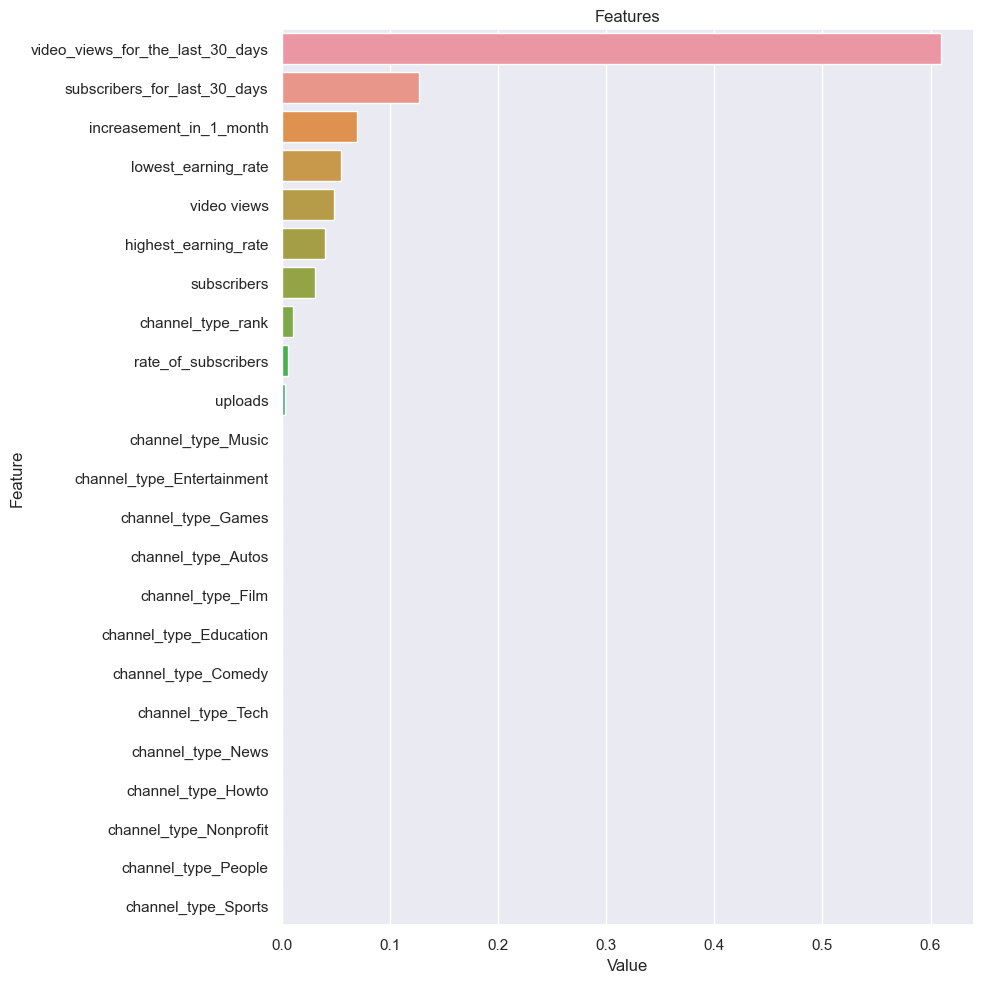

In [55]:
def plot_importance(model, features, num=len(X), save=False): #Hangi columnların önemi var veya yok kontrol ettim ve gereksiz olanları veriden sildim ki verimliliği azaltmasın
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(final_model, X)
#Hangi colunların daha etkili olduğuna baktım ve bazılarını çıkardım

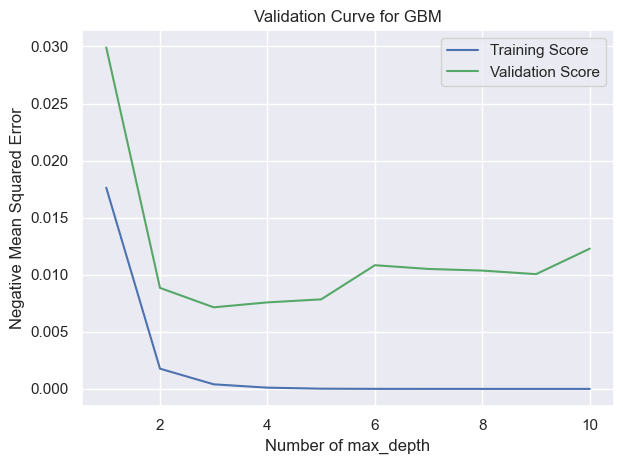

In [56]:

# Validation Curve işlemi
train_score, test_score = validation_curve(final_model, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="neg_mean_squared_error",
                                           cv=10) # Overfit var mı diye kontrol ettim

mean_train_score = -np.mean(train_score, axis=1)  # Negatifini alarak pozitif hale getirme
mean_test_score = -np.mean(test_score, axis=1)

# Görselleştirme
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for GBM")
plt.xlabel("Number of max_depth")
plt.ylabel("Negative Mean Squared Error")
plt.tight_layout()
plt.legend(loc='best')
plt.show()







In [61]:

final_model.predict(X_test.sample(1, random_state=45))


array([-0.73225493])